# Assignment 2




In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics


import os
import random

SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)

## Task 1 (20 points)

Under what assumption Decision Tree performes worse than Linear Regression?  
Create a dataset, choose train/test split, and make experiment to support the claim.  
Use `sklearn.linear_model.LinearRegression`, `sklearn.tree.DecisionTreeRegressor`, `sklearn.datasets.make_regression`  
Use MSE loss.

### Answer

Decision Tree will perform worse than a Linear Regression in case of big datasets with non-axis like separation. I will illustrate what i just said:

![hw2_1.jpg](https://drive.google.com/uc?export=view&id=1vRcaDZgJ0goTqIJXvwpBjlbYm7B_zcWq)

Here we can see DT green lines and tilted line which represents Linear Regression. As we can see there is an easy separation with the tilted line. We can't approach the same result with Decision Tree.


In [2]:
def get_separation_by_classes(dataset) -> dict:
  result = {}
  for (input, target) in dataset:
    if target in result:
      result[target].append(input)
    else:
      result[target] = [input]
  return result

In [3]:
from matplotlib import pyplot as plt

def unzip_list(zipped_list: list):
  elem_sz = len(zipped_list[0])
  return [[elem[i] for elem in zipped_list] for i in range(elem_sz)]

def plot_points(points: list, style: str):
  axis_points = unzip_list(points)
  assert(len(axis_points) == 2)

  plt.plot(axis_points[0], axis_points[1], style)

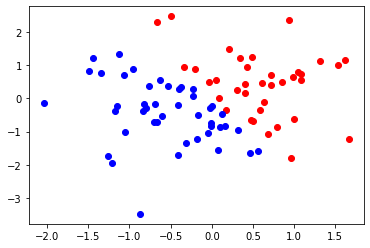

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split


X, y = datasets.make_regression(
    n_samples=80, n_features=2, n_targets=1, bias=0.0, noise=0.0, coef=False
)

# outputs = [1 if (output > 0) else -1 for output in outputs]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

plt.figure()

class_separation = get_separation_by_classes(zip(X, y))
for key in class_separation:
  plot_points(class_separation[key], 'ro' if (key > 0) else 'bo')

plt.show()


In [15]:
from sklearn import linear_model, tree

linear_regr = linear_model.LinearRegression().fit(X_train, y_train)
print(linear_regr.score(X_test, y_test))

tree_regr = tree.DecisionTreeRegressor().fit(X_train, y_train)
print(tree_regr.score(X_test, y_test))


1.0
0.7934004087979503


Another thing that I found out while I was tuning parameters of _train_test_split_ is that if train dataset is small enough then score of DecisionTree regressor will be much lower.

I can describe it as overfitting, because if there is not enough examples then DecisionTree will be able to memorize all of these train points. And if so it won't figure out any dependance between point and result.

## Task 2 (20 points)
Make dataset preprocessing as described below 

In [140]:
from sklearn import preprocessing
from tqdm import tqdm
from sklearn import base

In [141]:
df = pd.read_csv('data.csv')
del df['id']
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [142]:
df['month'] = df['month'].map({'January':1, 'February':2, 'March': 3, 'April': 4, 
                               'May':5, 'June':6, 'July':7, 'August':8})

In [143]:
df['credit_history_age'].head()

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
Name: credit_history_age, dtype: object

In [144]:
from math import isnan

def get_months(string_or_nan) -> str:
  if type(string_or_nan) == float and isnan(string_or_nan):
    return 0
  split_string = string_or_nan.split(' ')
  return 12 * int(split_string[0]) + int(split_string[3])


In [145]:
# TODO: convert column into number of months (float). Fill missing data with 0


df['credit_history_age'] = list(map(get_months, df['credit_history_age']))

In [146]:
df['type_of_loan'].head()

0    Auto Loan, Credit-Builder Loan, Personal Loan,...
1    Auto Loan, Credit-Builder Loan, Personal Loan,...
2    Auto Loan, Credit-Builder Loan, Personal Loan,...
3    Auto Loan, Credit-Builder Loan, Personal Loan,...
4    Auto Loan, Credit-Builder Loan, Personal Loan,...
Name: type_of_loan, dtype: object

In [147]:
def get_all_loan_types_from_column(loan_types_column) -> set:
  def delete_and_word(string: str):
    if string[:3] == 'and':
      return string[4:]
    return string

  result = set()
  for elem in loan_types_column:
    if type(elem) != str and isnan(elem):
      continue
    elem_loan_types = list(map(delete_and_word, elem.split(', ')))
    result = result.union(elem_loan_types)
  return result

In [148]:
def make_bin_values_column_for_class(column_with_classes, class_name):
  result = []
  for elem_with_classes_or_nan in column_with_classes:
    if type(elem_with_classes_or_nan) != str and isnan(elem_with_classes_or_nan):
      result.append(False)
    else:
      result.append(class_name in elem_with_classes_or_nan)
  return result

In [149]:
# TODO type_of_loan is a combination of flags
# for each type of loan create a seperate colum with binary values.
# fill missing data with 0

loan_types = get_all_loan_types_from_column(df['type_of_loan'])
for col in loan_types:
    col_name = col.replace(' ', '_')
    df[col_name] = make_bin_values_column_for_class(df['type_of_loan'], col)


In [150]:
del df['type_of_loan']

In [156]:
def get_averages_by_cols(col_names, fixed_col_name):
  avgs = dict()
  for i in tqdm(range(len(df[fixed_col_name]))):
    elem = df[fixed_col_name][i]
    if elem not in avgs:
      avgs[elem] = dict()
      for col in col_names:
        avgs[elem][col] = (0, 0)
    for col in col_names:
      col_maybe_str = df[col][i]
      if isinstance(col_maybe_str, str):
        col_maybe_str = "".join(list(filter(lambda c: '0' <= c <= '9' or c == '.', col_maybe_str)))
      col_value = float(col_maybe_str)
      if isnan(col_value):
        continue
      (sum, amount) = avgs[elem][col]
      sum += col_value
      amount += 1
      avgs[elem][col] = (sum, amount)
  return avgs

In [152]:
nan_columns = [
    'monthly_inhand_salary',
    'num_of_delayed_payment',
    'num_credit_inquiries',
    'credit_history_age',
    'amount_invested_monthly',
    'monthly_balance'
]

# template_ds = df.head()

# for col in nan_columns:
#   res = []

#   for i in range(len(template_ds[col])):
#     float_elem = float(template_ds[col][i])
#     if isnan(float_elem):
#       res.append(get_average_by_col_with_fixed_par(template_ds[col], template_ds['customer_id'], template_ds['customer_id'][i]))
#     else:
#       res.append(float_elem)




In [159]:
from operator import mod

# TODO replace missing values in the columns with an average over values with the same client_id 
# If all values within the same client_id are missing, replace them with an average over entire column

avgs = get_averages_by_cols(nan_columns, 'customer_id')

for col in tqdm(nan_columns):
  new_values = []
  for i in range(len(df[col])):
    col_maybe_str = df[col][i]
    if isinstance(col_maybe_str, str):
      col_maybe_str = "".join(list(filter(lambda c: '0' <= c <= '9' or c == '.', col_maybe_str)))
    col_value = float(col_maybe_str)
    if isnan(col_value):
      (sum, amount) = avgs[df['customer_id'][i]][col]
      new_values.append(sum / amount)
    else:
      new_values.append(col_value)
  df[col] = new_values

100%|██████████| 6/6 [00:05<00:00,  1.19it/s]


In [164]:
ctg_columns = [
            'customer_id', 'name', 'credit_score', 'payment_behaviour', 'occupation', 'ssn', 
            'payment_of_min_amount', 'credit_mix', 
        ]

# TODO encode column values with integers. Use sklearn.preprocessing.LabelEncoder

from sklearn import preprocessing

def map_indexed(elems):
  index = 0
  result = dict()
  for elem in elems:
    result[elem] = index
    index += 1
  return result


for col in ctg_columns:
  classes = map_indexed(preprocessing.LabelEncoder().fit(df[col]).classes_)
  new_col = []
  for elem in df[col]:
    new_col.append(classes[elem])
  df[col] = new_col


In [165]:
def fix(x):
    if isinstance(x, str):
        x = x.replace('_', '')
        if len(x) > 0:
            return float(x)
        else:
            return 0
    else:
        return float(x)
    
for col in df.columns:
    df[col] = df[col].apply(fix)

In [174]:
if np.all(pd.isnull(df).sum() == 0) and (np.isnan(df.values.astype(float)).sum() == 0):
    print('success')
else:
  print('nope')

success


In [181]:
df.drop(columns=['customer_id', 'name', 'ssn'])

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,credit_score,Auto_Loan,Student_Loan,Mortgage_Loan,Not_Specified,Personal_Loan,Payday_Loan,Credit-Builder_Loan,Home_Equity_Loan,Debt_Consolidation_Loan
0,1.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,3.0,-500.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,4.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,5.0,23.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,5.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,6.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,27.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,7.0,25.0,9.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:


df_test = df[df['month'] == 8].reset_index(drop=True)
df_train = df[df['month'] != 8].reset_index(drop=True)
len(df_train)


87500

In [183]:
X_test, y_test = df_test.drop(columns='credit_score').values, df_test['credit_score'].values
X_train, y_train = df_train.drop(columns='credit_score').values, df_train['credit_score'].values

## Task 3 (20 points)
Fit Random Forest Classifier on the dataset.  
Implement grid search with some cross-validation schema to select hyperparams for Random Forest.  
Surpass baseline F1_macro = 0.72 on the test subset  
Tune only most sensitive hyperparams, consider your computational budget.  

Note: you cannot use sklearn.model_selection.GridSearchCV

In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


In [197]:


estimators_space = [200, 600, 1000]
max_depth_space = [3, 5]
criterion_space = ['gini', 'entropy']
bootstrap_space = [True]
max_samples_space = [32, 64]

records = []

kf = KFold(n_splits=5, random_state=None) 


for estimators in estimators_space:
  for criterion in criterion_space:
    for bootstrap in bootstrap_space:
      for max_samples in max_samples_space:
        for max_depth in max_depth_space:
          scores = []
          for train_index, valid_index in kf.split(X_train):
            train_X, train_y = X_train[train_index], y_train[train_index]
            valid_X, valid_y = X_train[valid_index], y_train[valid_index]
            classifier = RandomForestClassifier(random_state=0,
                                                n_estimators=estimators,
                                                criterion=criterion,
                                                bootstrap=bootstrap,
                                                max_samples=max_samples if (bootstrap) else None,
                                                max_depth=max_depth)
            
            classifier.fit(train_X, train_y)

            valid_pred = classifier.predict(valid_X)

            scores.append(metrics.f1_score(valid_y, valid_pred, average=None))

          records.append({'estimators': estimators,
                          'criterion': criterion,
                          'bootstrap': bootstrap,
                          'max_samples': max_samples,
                          'max_depth': max_depth,
                          'score': np.mean(scores)})
          print(np.mean(scores))

0.41105461909984586
0.4523763169695652
0.4371971438697246
0.514081453639249
0.415810932092053
0.44857001253107537
0.43532080848230437
0.5102596810172234
0.41465200717885486
0.4520858232435421
0.4403770778668837
0.5140664825670997
0.41388399978726914
0.4452486383411209
0.4390138349384037
0.507137151840649
0.4125104233603963
0.4502403719952191
0.43688630235970355
0.5117956262917149
0.4116205267848561
0.44204484095740276
0.43462135996536316
0.505335118943519


In [198]:
records = pd.DataFrame(records)
records.groupby(['estimators', 'criterion', 'bootstrap', 'max_samples', 'max_depth']).mean()

score
estimators criterion bootstrap max_samples max_depth          
200        entropy   True      32          3          0.415811
                                           5          0.448570
                               64          3          0.435321
                                           5          0.510260
           gini      True      32          3          0.411055
                                           5          0.452376
                               64          3          0.437197
                                           5          0.514081
600        entropy   True      32          3          0.413884
                                           5          0.445249
                               64          3          0.439014
                                           5          0.507137
           gini      True      32          3          0.414652
                                           5          0.452086
                               64          3          0.440377
                                           5          0.514066
1000       entropy   True      32          3          0.411621
                                           5          0.442045
                               64          3          0.434621
                                           5          0.505335
           gini      True      32          3          0.412510
                                           5          0.450240
                               64          3          0.436886
                                           5          0.511796

In [200]:
records

,estimators,criterion,bootstrap,max_samples,max_depth,score
0,200,gini,True,32,3,0.411055
1,200,gini,True,32,5,0.452376
2,200,gini,True,64,3,0.437197
3,200,gini,True,64,5,0.514081
4,200,entropy,True,32,3,0.415811
5,200,entropy,True,32,5,0.448570
6,200,entropy,True,64,3,0.435321
7,200,entropy,True,64,5,0.510260
8,600,gini,True,32,3,0.414652
9,600,gini,True,32,5,0.452086


In [204]:
best_params = records.iloc[records['score'].idxmax()]

print(best_params)
# don't forget to retrain model on the whole train dataset

classifier = RandomForestClassifier(random_state=0,
                                                n_estimators=best_params['estimators'],
                                                criterion=best_params['criterion'],
                                                bootstrap=best_params['bootstrap'],
                                                max_samples=best_params['max_samples'] if (bootstrap) else None,
                                                max_depth=best_params['max_depth'])

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
score = metrics.f1_score(y_test, y_pred, average='macro')
print(score)
if score >= 0.72:
    print('success')

estimators          200
criterion          gini
bootstrap          True
max_samples          64
max_depth             5
score          0.514081
Name: 3, dtype: object
0.4746227078036487


## Task 4 (20 points)

Fit XGBoost classifier on the dataset.  
Implement grid search with hold-out validation schema to select hyperparams.  
Surpass baseline F1_macro = 0.73 on the test subset  
Tune only most sensitive hyperparams, consider your computational budget.  

Note: use additional arguments (eval_metric, eval_set) in XGBoost classifier to make early stopping.

In [ ]:
import xgboost as xgb

In [ ]:
hyp1_space = ...
...
hypk_space = ...

records = []

train, valid = split(X_train, y_train, ...):
    
for hyp1_value in hyp1_space:
    ...
    for hypk_value in hypk_space:
        ...
        model = xgb.XGBClassifier(...)
        model.fit(...)
        y_pred = model.predict(...)
        score = metrics.f1_score(y_valid, y_pred, average='macro')
        records.append({'hyp1': hyp1, ..., 'hypk': hypk,  'score': score})

In [ ]:
records = pd.DataFrame(records)
records.loc[records['score'].argmax()]

In [ ]:
best_params = ...

# don't forget to retrain model on the whole train dataset

y_pred = model.predict(X_test)
score = metrics.f1_score(y_test, y_pred, average='macro')

if score >= 0.73:
    print('success')

## Task 5 (20 points)

How feature importance is connected to the underlying model?   
Select top 10 most important features from Logistic Regression and Random Forest.   
On these selected features fit logistic regression with L2 norm regularization and some fixed regularization coefficient.  
Which selected features are better in terms of F1_macro score?
